# Formulas

Assumptions:
- Tail is a rigid cylinder 
- Tail attitude is perfectly perpandicular to incoming wind
- Tail only rotates about roll-axis

**Torque Inertial**

$T_{inertial} = I_{tail} \cdot \ddot{\alpha}$


**Torque Aerodynamic**

$T_{aero} = \frac{1}{2} \rho A C_D \int_{L}^{L_0} \sqrt{(\dot\alpha x)^2 + v_{wind}^2} \dot\alpha x^2 dx$





Where:
- $\alpha(t)$ is the angle of the tail, where $\dot\alpha$ and $\ddot\alpha$ are angular velocity and angular acceleration respectively
- $x$ is a variable along the length of the tail. Where the tail has a total length of $L$, but is partially occluded by the body. The effective lenght of the tail affected by incoming wind is $L - L_0$
- $v_wind$ is the incoming wind speed. $v_wind$ is parallel to the roll-axis, e.g. always perpandicular to the tail motion.

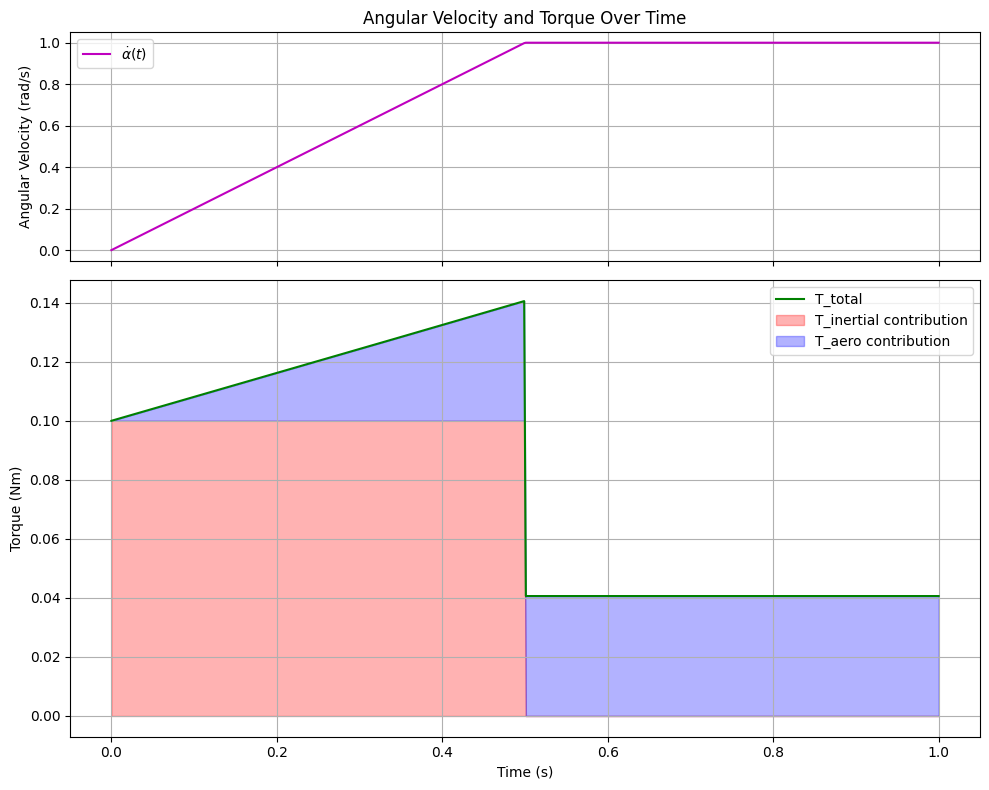

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define constants
I_tail = 0.1  # Moment of inertia of the tail (adjustable)
rho = 1.225  # Air density in kg/m^3 (adjustable)
A = 0.02  # Cross-sectional area in m^2 (adjustable)
C_D = 1  # Drag coefficient (adjustable)
L = 1.0  # Length from the base to tip in meters (adjustable)
L0 = 0.2  # Starting point of the length for integration (adjustable)
v_wind = 10  # Wind velocity in m/s (adjustable)
a = 2.0  # Constant acceleration in rad/s^2 (adjustable)

t0 = 0
t1 = 0.5
t2 = 1

a_t1 = (t1 - t0) * a

# Define the angular velocity profile (piecewise function)
def alpha_dot(t):
    if t0 <= t < t1:
        return a * t
    elif t1 <= t <= t2:
        return a_t1
    else:
        return 0

# Compute the derivative of angular velocity (angular acceleration)
def alpha_ddot(t):
    if t0 <= t < t1:
        return a_t1
    else:
        return 0

# Calculate T_inertial
def T_inertial(t):
    return I_tail * alpha_ddot(t)

# Calculate T_aero using numerical integration
def T_aero(t):
    alpha_dot_t = alpha_dot(t)
    if alpha_dot_t == 0:
        return 0  # No aerodynamic torque if angular velocity is zero
    
    # Define the integrand
    def integrand(x):
        return np.sqrt((alpha_dot_t * x) ** 2 + v_wind ** 2) * alpha_dot_t * x**2
    
    # Perform the integral
    integral, _ = quad(integrand, L0, L)
    return 0.5 * rho * A * C_D * integral

# Time range
time = np.linspace(t0, t2, 500)

# Calculate torques and angular velocity over time
alpha_dot_values = np.array([alpha_dot(t) for t in time])
T_inertial_values = np.array([T_inertial(t) for t in time])
T_aero_values = np.array([T_aero(t) for t in time])
T_total_values = T_inertial_values + T_aero_values

# Create a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [1, 2]}, sharex=True)

# Plot the angular velocity profile in the first subplot
ax[0].plot(time, alpha_dot_values, label=r'$\dot{\alpha}(t)$', color='m')
ax[0].set_ylabel('Angular Velocity (rad/s)')
ax[0].set_title('Angular Velocity and Torque Over Time')
ax[0].grid(True)
ax[0].legend()

# Plot the total torque with shaded contributions in the second subplot
ax[1].plot(time, T_total_values, label='T_total', linestyle='-', color='g')
ax[1].fill_between(time, 0, T_inertial_values, color='r', alpha=0.3, label='T_inertial contribution')
ax[1].fill_between(time, T_inertial_values, T_total_values, color='b', alpha=0.3, label='T_aero contribution')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Torque (Nm)')
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()
